<a href="https://colab.research.google.com/github/Staffilon/KestraDataOrchestrator/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path_to_folder = '/content/drive/My Drive/Dati-TBDM'

In [9]:
path_to_file = '/content/drive/My Drive/Dati-TBDM/energy_bak/energy_bak/location_Tormatic-channel_108-register_Ea_Imp_2022-08-10T00-00-00Z_2022-08-10T23-59-59Z.csv'

# **Just a check on one of the files to see if the dataframe its correctly displayed, gave a brief look on the general structure of the dataframe and noticed that there are some missing values, we should handle this through feature engineering.**

In [10]:
import pandas as pd
from IPython.display import display

# Leggi il file CSV
df = pd.read_csv(path_to_file)

# Visualizza le prime 5 righe del DataFrame
display(df.head())

,id,TimeStamp,Ea_Imp
0,0,2022-08-10T00:00:00Z,113.7
1,1,2022-08-10T00:15:00Z,117.1
2,2,2022-08-10T00:30:00Z,110.8
3,3,2022-08-10T00:45:00Z,111.2
4,4,2022-08-10T01:00:00Z,122.5


In [15]:
print("Dataframe informations:")
display(df.info())

Dataframe informations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         95 non-null     int64  
 1   TimeStamp  95 non-null     object 
 2   Ea_Imp     91 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB


None

In [14]:
print("Descriptive statistichs")
display(df.describe())

Descriptive statistichs


,id,Ea_Imp
count,95.000000,91.000000
mean,47.000000,39.240659
std,27.568098,55.545151
min,0.000000,0.000000
25%,23.500000,0.000000
50%,47.000000,0.900000
75%,70.500000,112.550000
max,94.000000,150.500000


In [13]:
print("Dataframe dimensions:")
display(df.shape)

Dataframe dimensions:


(95, 3)

# **Here I decided to combine all the csv files present in the energy_bak folder. I also added a column named channel which is the ID of the machine. **

In [18]:
import os
import re  # Regular expression library

# Assuming all CSV files are in a single directory
directory = '/content/drive/My Drive/Dati-TBDM/energy_bak/energy_bak'

all_data = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Check if the filename contains 'channel_XXX' pattern
        if re.search('channel_\d{3}', filename):
            file_path = os.path.join(directory, filename)
            temp_df = pd.read_csv(file_path)
            # Extract channel number from filename and assign it to 'channel' column
            temp_df['channel'] = re.search('channel_(\d{3})', filename).group(1)
            all_data = all_data.append(temp_df, ignore_index=True)
        else:
            print(f"Skipping file: {filename}")

# Now `all_data` contains only the data from files that match the pattern

Skipping file: location_Esempio_Industria-channel_Energia_acquistata_totale-register_Ea_Imp_2021-04-01T00-00-00Z_2021-04-06T00-00-00Z.csv


<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(temp_df, ignore_index=True)
<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(temp_df, ignore_index=True)
<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(temp_df, ignore_index=True)
<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(temp_df, ignore_index=True)
<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and wil

Skipping file: Tormatic_20211217_18331426.csv
Skipping file: Tormatic_20220602_0033112.csv
Skipping file: Tormatic_20220604_0033114.csv
Skipping file: Tormatic_20220527_12525310.csv
Skipping file: Tormatic_20220529_0033111.csv
Skipping file: Tormatic_20220528_0033008.csv
Skipping file: Tormatic_20220531_0033113.csv
Skipping file: Tormatic_20220601_0033112.csv
Skipping file: Tormatic_20220603_0033113.csv
Skipping file: Tormatic_20211217_18312033.csv
Skipping file: Tormatic_20220530_0033113.csv
Skipping file: Tormatic_20220605_0033117.csv
Skipping file: Tormatic_20220620_15260376.csv
Skipping file: Tormatic_20220610_0033118.csv
Skipping file: Tormatic_20220624_ 3303163.csv
Skipping file: Tormatic_20220628_ 3303166.csv
Skipping file: Tormatic_20220609_0033118.csv
Skipping file: Tormatic_20220621_ 3303159.csv
Skipping file: Tormatic_20220608_0033118.csv
Skipping file: Tormatic_20220622_ 3303160.csv
Skipping file: Tormatic_20220606_0033117.csv
Skipping file: Tormatic_20220626_ 3303162.csv
S

Output streaming troncato alle ultime 5000 righe.
<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(temp_df, ignore_index=True)
<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(temp_df, ignore_index=True)
<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(temp_df, ignore_index=True)
<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(temp_df, ignore_index=True)
<ipython-input-18-a9bdfe605ea5>:17: FutureWarn

Skipping file: location_Esempio_Industria-channel_Energia_acquistata_totale-register_Ea_Imp_Er_Ind_Imp_2021-04-01T00-00-00Z_2021-04-06T00-00-00Z.csv


<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(temp_df, ignore_index=True)
<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(temp_df, ignore_index=True)
<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(temp_df, ignore_index=True)
<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(temp_df, ignore_index=True)
<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and wil

In [19]:
display(all_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830845 entries, 0 to 830844
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         830845 non-null  int64  
 1   TimeStamp  830845 non-null  object 
 2   Ea_Imp     567805 non-null  float64
 3   channel    830845 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 25.4+ MB


None

In [20]:
all_data.head()

,id,TimeStamp,Ea_Imp,channel
0,0,2023-08-18T00:00:00Z,0.0,612
1,1,2023-08-18T00:15:00Z,0.0,612
2,2,2023-08-18T00:30:00Z,0.0,612
3,3,2023-08-18T00:45:00Z,0.0,612
4,4,2023-08-18T01:00:00Z,0.0,612


from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('TimeStamp').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('TimeStamp')):
  _plot_series(series, series_name, i)
  fig.legend(title='TimeStamp', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['TimeStamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'TimeStamp'}, axis=1)
              .sort_values('TimeStamp', ascending=True))
  xs = counted['TimeStamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('TimeStamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('TimeStamp')):
  _plot_series(series, series_name, i)
  fig.legend(title='TimeStamp', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TimeStamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Ea_Imp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Ea_Imp'}, axis=1)
              .sort_values('Ea_Imp', ascending=True))
  xs = counted['Ea_Imp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Ea_Imp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('TimeStamp')):
  _plot_series(series, series_name, i)
  fig.legend(title='TimeStamp', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Ea_Imp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['TimeStamp'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='id', y='TimeStamp', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [25]:
# Convert 'timestamp' column to datetime
all_data['TimeStamp'] = pd.to_datetime(all_data['TimeStamp'])

# Sort by 'machine_id' and then by 'timestamp'
all_data_sorted = all_data.sort_values(by=['channel', 'TimeStamp'])

# Specify the path where you want to save the combined and sorted CSV file
output_file_path = '/content/drive/My Drive/sorted_combined_energy_data.csv'

# Save the sorted DataFrame to a CSV file
all_data_sorted.to_csv(output_file_path, index=False)

print(f"Sorted combined CSV saved to {output_file_path}")

Sorted combined CSV saved to /content/drive/My Drive/sorted_combined_energy_data.csv


# **Removing the null values rows when Ea Imp is null. This is mainly cause null values can interfere with our analysis considering ea imp is a crucial information in our dataset.**

In [27]:
all_data = all_data[all_data['Ea_Imp'].notnull()]

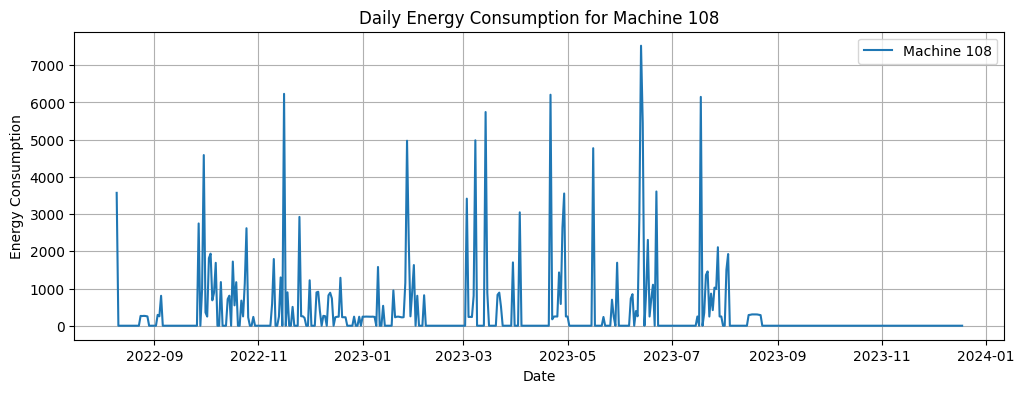

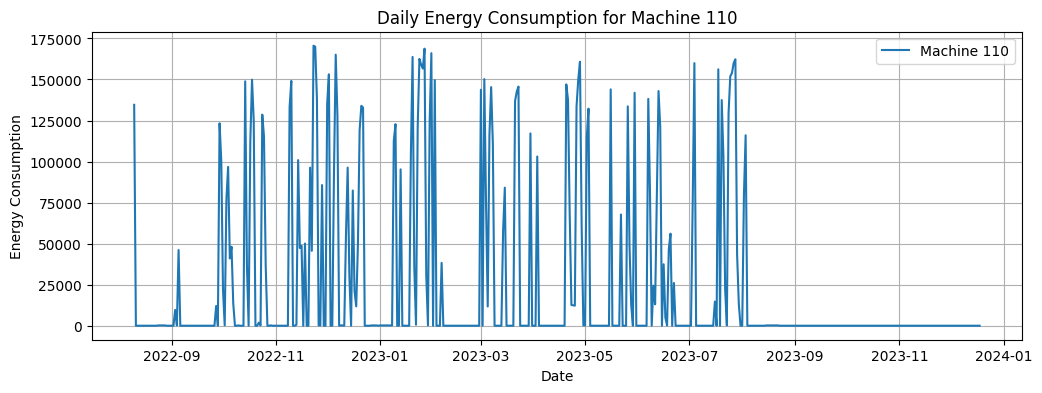

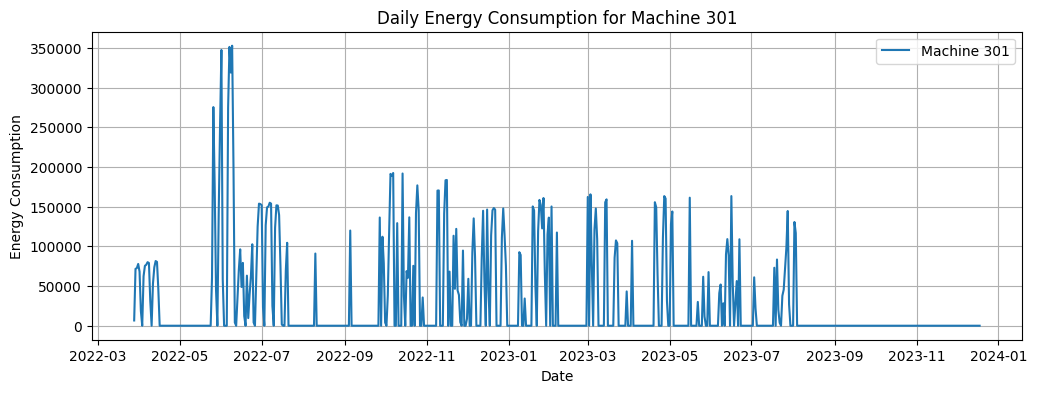

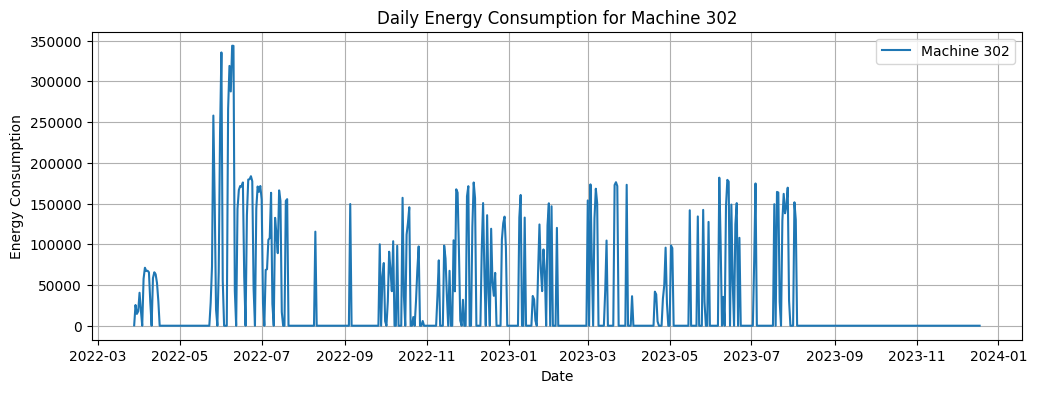

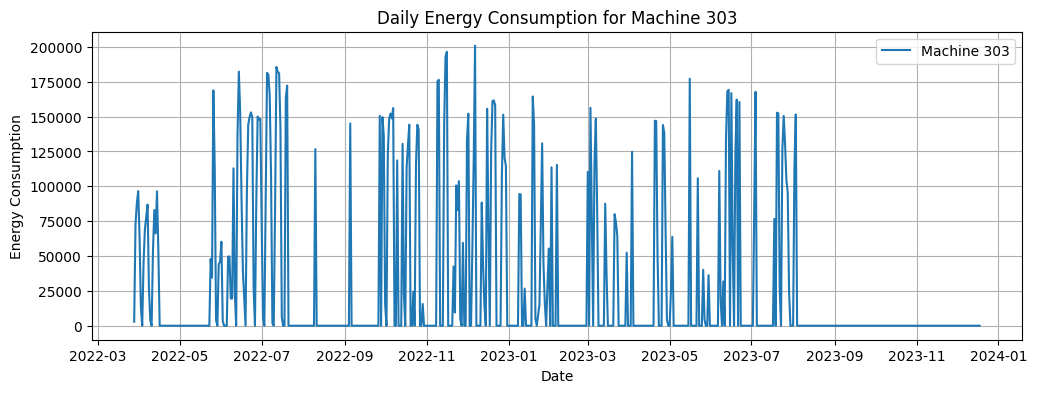

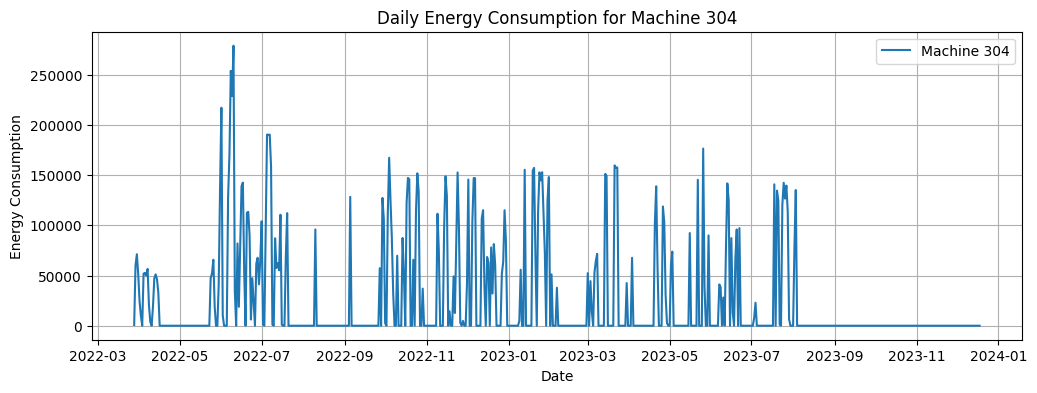

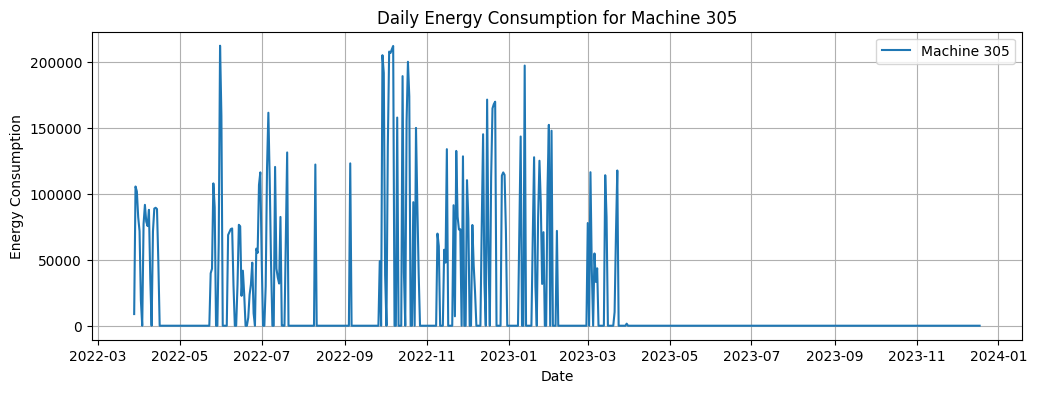

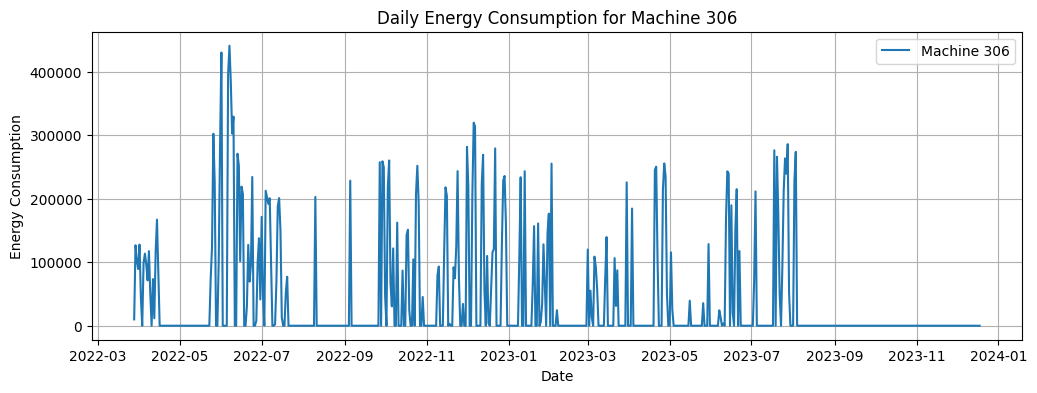

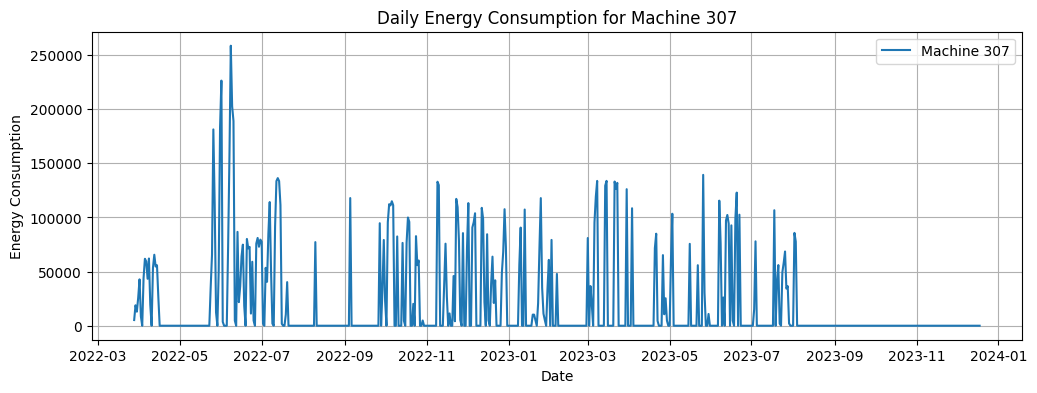

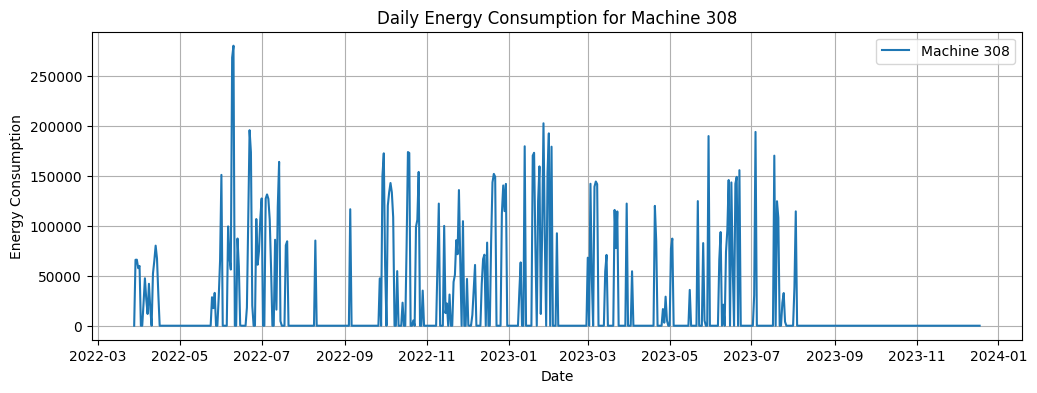

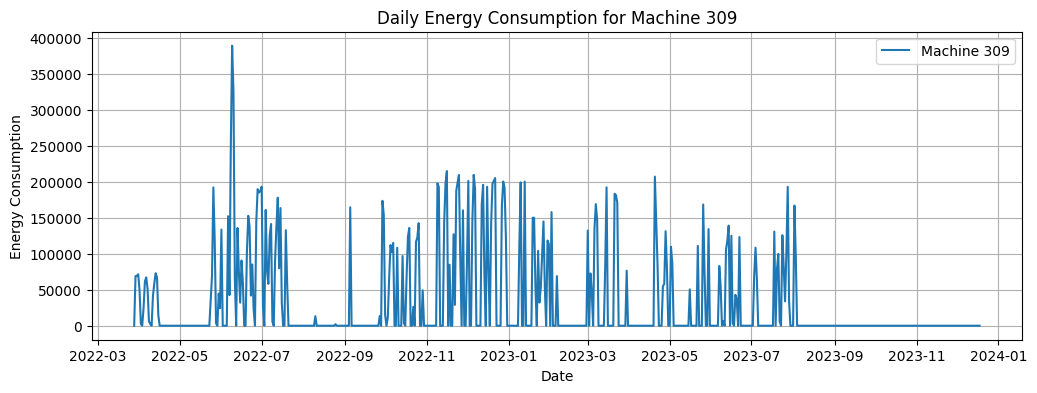

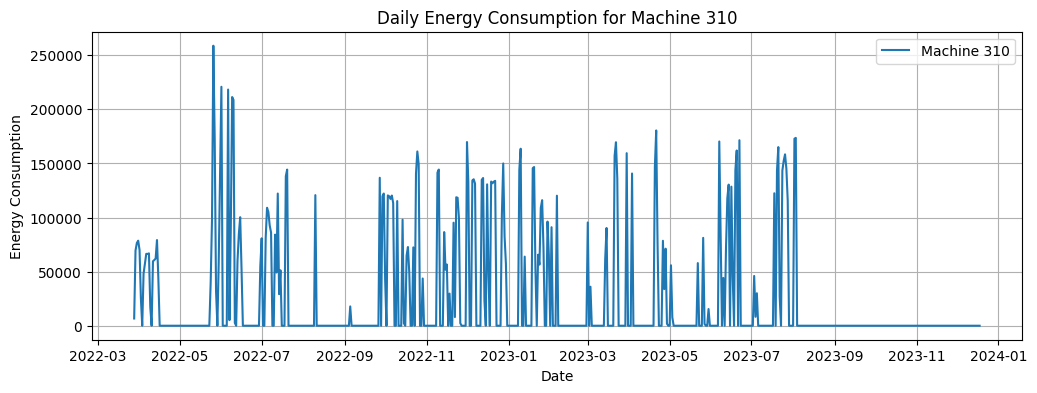

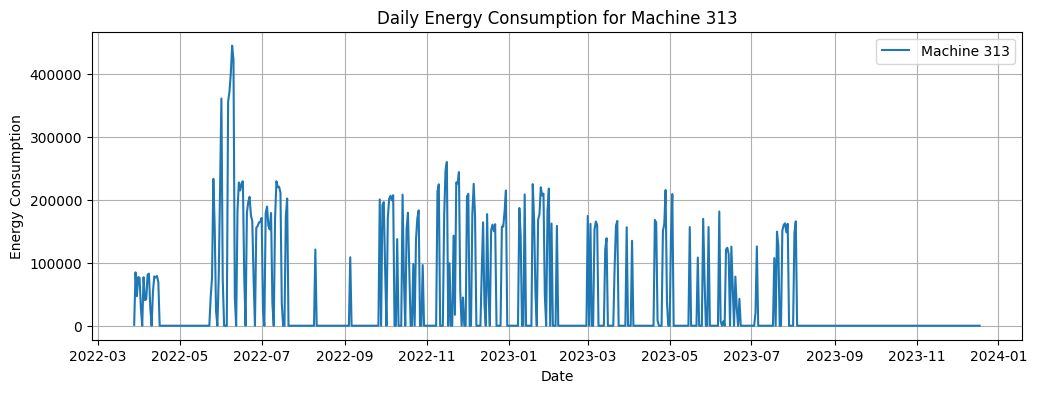

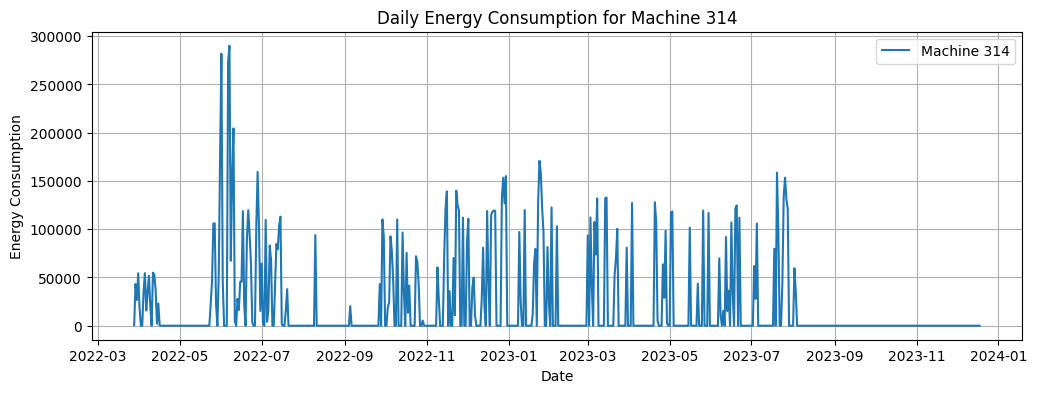

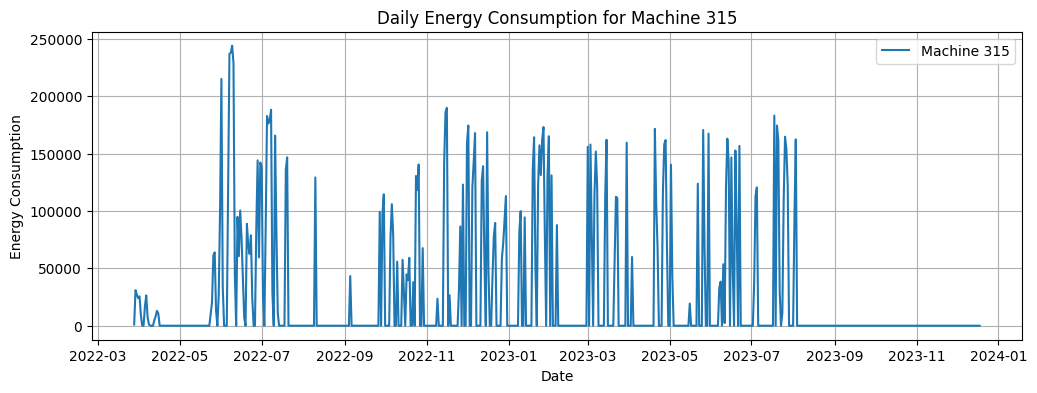

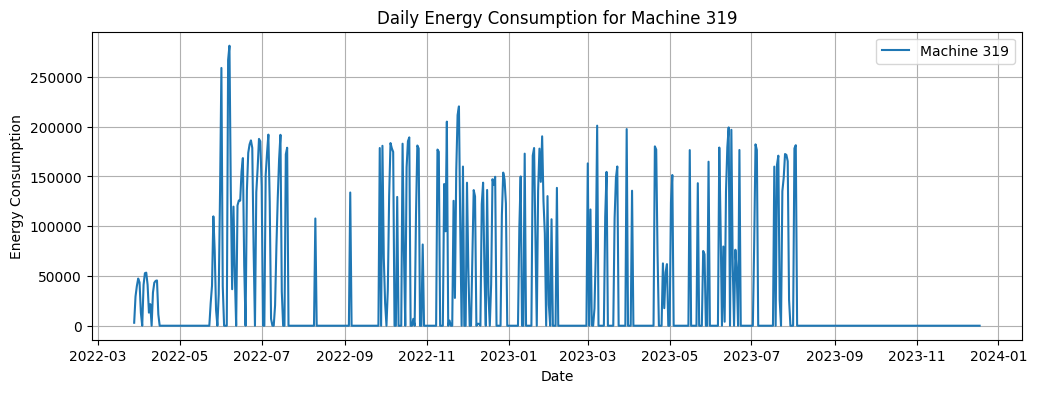

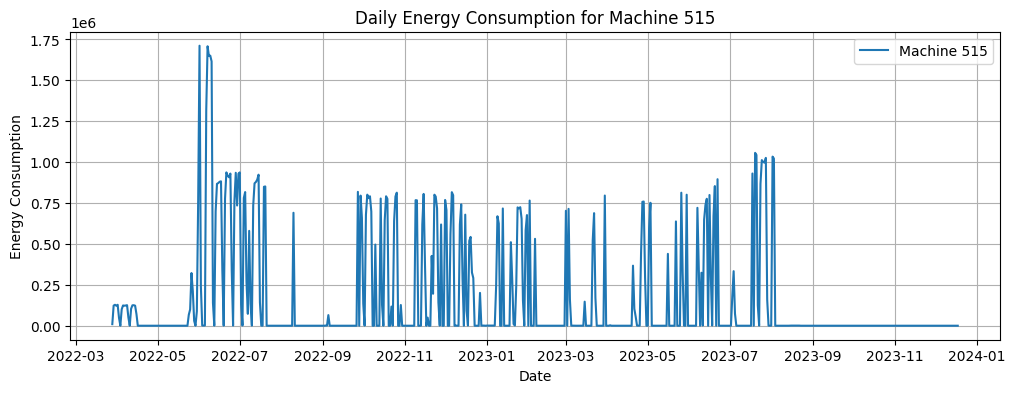

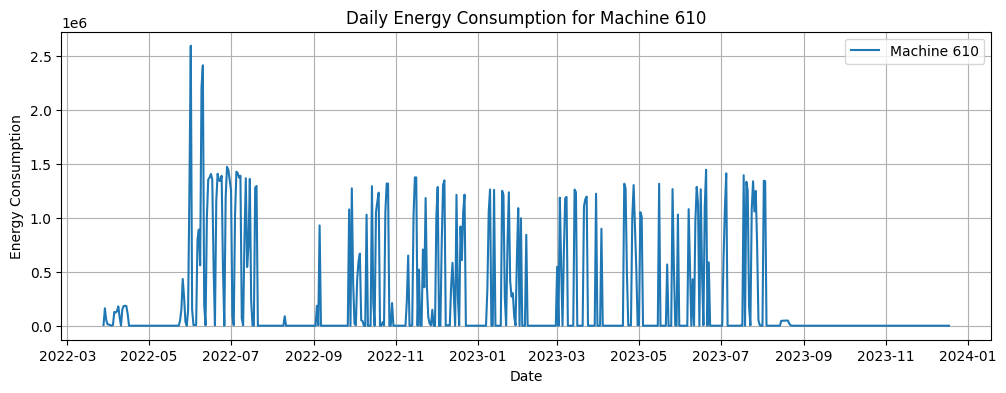

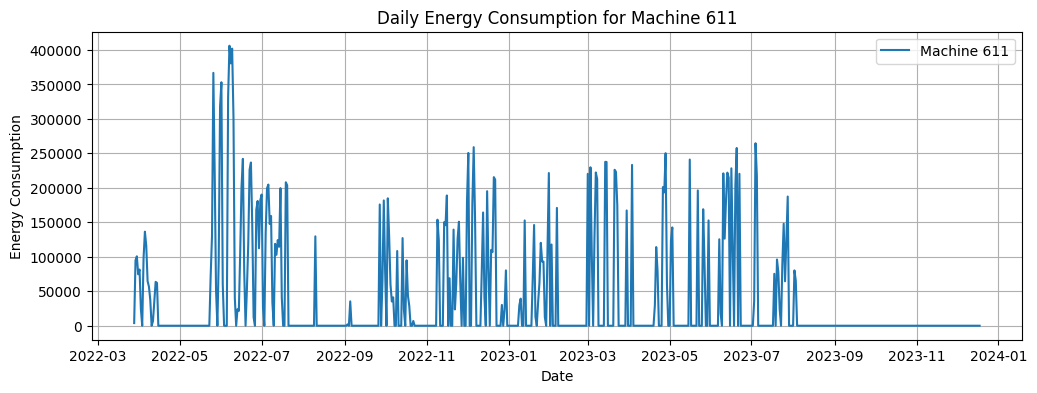

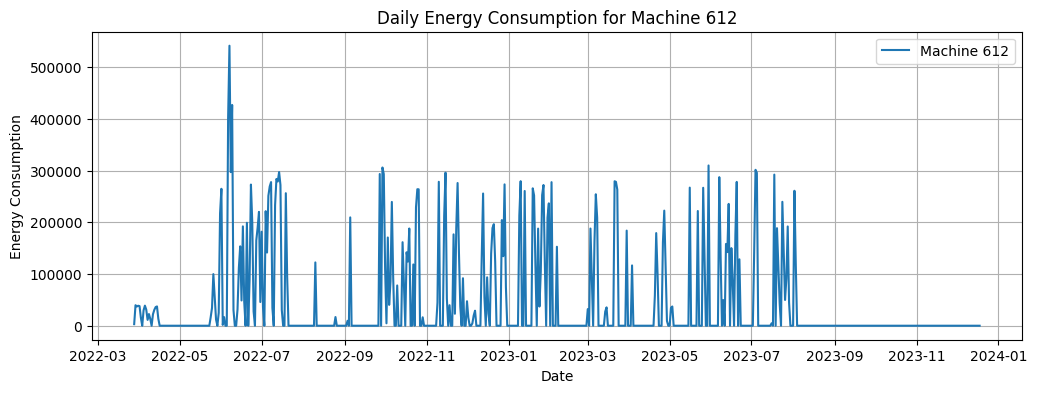

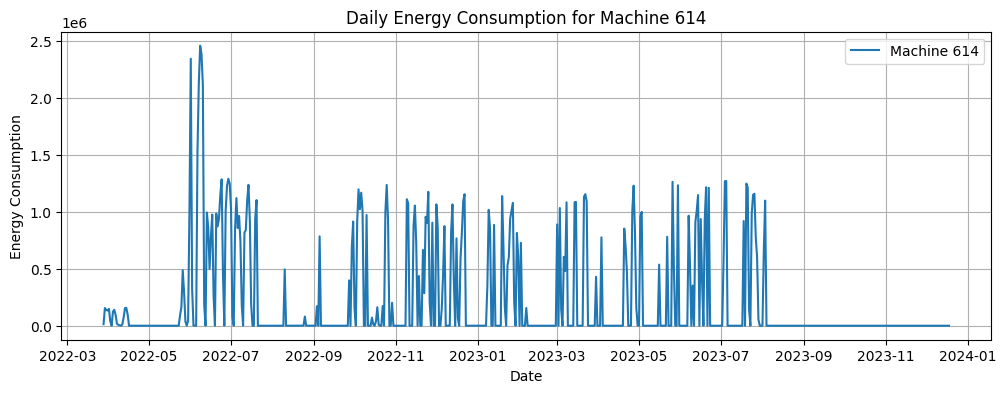

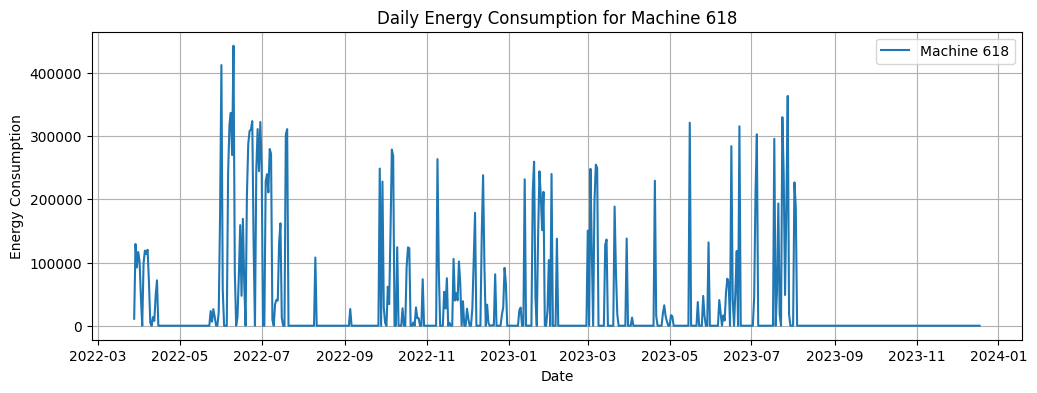

In [28]:
import matplotlib.pyplot as plt

# Unique list of machines
machines = all_data_sorted['channel'].unique()

# Plot for each machine
for machine in machines:
    machine_data = all_data_sorted[all_data_sorted['channel'] == machine]
    machine_data.set_index('TimeStamp', inplace=True)
    daily_data = machine_data.resample('D')['Ea_Imp'].sum()

    plt.figure(figsize=(12, 4))
    plt.plot(daily_data.index, daily_data.values, label=f'Machine {machine}')
    plt.xlabel('Date')
    plt.ylabel('Energy Consumption')
    plt.title(f'Daily Energy Consumption for Machine {machine}')
    plt.legend()
    plt.grid(True)
    plt.show()
